In [1]:
# Standard Python Packages
import math
import os
import platform
import sys

# Common Third-Party Packages
import cv2
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import PIL
from sklearn.decomposition import PCA
import scipy
from scipy import fftpack

# Custom
import lab2

In [2]:
# Read image file
filepath = 'mydata/01_copy.bmp'
title = 'Copy of Pepper Image (Uncompressed)'

# Read image
#img = cv2.imread(filepath)
img = mpl.image.imread(filepath)
#img = PIL.Image.open(filepath)

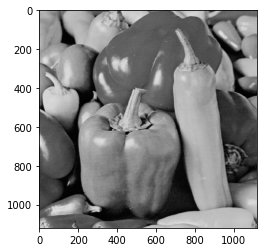

In [3]:
plt.imshow(img)

In [4]:
# Convert PIL image to NumPy array
img = np.asarray(img)

In [5]:
# Convert to grayscale by getting one of the channel values (all seem the same)
img = img[:,:,0]

In [6]:
# Save 2-D version
imgPIL = PIL.Image.fromarray(img)
imgPIL.save('mydata/02_grayscale.bmp')

In [7]:
# Calculate mean
total = 0
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        total = total + img[i][j]
u = total/(img.shape[0]*img.shape[1])
total = 0
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        total = total + pow((img[i][j] - u), 2)
var_o = total/(img.shape[0]*img.shape[1])

In [8]:
# Define block sizes
block_sizes = [1088, 1024, 960, 896, 832, 768, 704, 640, 576, 512, 384, 256, 128, 96, 64, 48, 32, 28, 24, 16, 8]

In [9]:
list_var_e = []
for k in block_sizes:
    print(k)
    imgCompressed = lab2.dct2(img, k)
    imgFixedpoint = imgCompressed.astype(np.uint8)
    imgPIL = PIL.Image.fromarray(imgFixedpoint)
    imgPIL.convert("L")
    filepath = 'mydata/04_compressed_' + str(k) + '.bmp'
    imgPIL.save(filepath)
    imgReconstructed = lab2.idct2(imgCompressed, k)
    total = 0
    for i in range(0, imgReconstructed.shape[0]):
        for j in range(0, imgReconstructed.shape[1]):
            total = total + imgReconstructed[i][j]
    u = total/(imgReconstructed.shape[0] * imgReconstructed.shape[1])
    total = 0
    for i in range(0, imgReconstructed.shape[0]):
        for j in range(0, imgReconstructed.shape[1]):
            total = total + pow((imgReconstructed[i][j] - u), 2)
    var_e = total/(imgReconstructed.shape[0]*imgReconstructed.shape[1])
    list_var_e.append(var_e)
    imgFixedpoint = imgReconstructed.astype(np.uint8)
    imgPIL = PIL.Image.fromarray(imgFixedpoint)
    imgPIL.convert("L")
    filepath = 'mydata/05_reconstructed_' + str(k) + '.bmp'
    imgPIL.save(filepath)

1088
1024
960
896
832
768
704
640
576
512
384
256
128
96
64
48
32
28
24
16
8


In [10]:
list_snr = []

for v in list_var_e:
    x = var_o / v
    snr = 10 * math.log(x, 10)
    list_snr.append(snr)

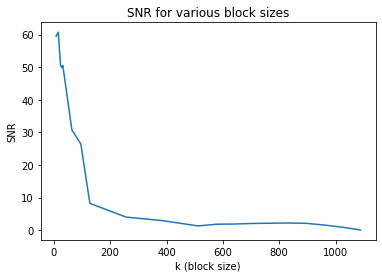

In [11]:
# plotting the points
block_sizes.reverse()
list_snr.reverse()
plt.plot(block_sizes, list_snr)
# naming the x axis
plt.xlabel('k (block size)')
# naming the y axis
plt.ylabel('SNR')
# giving a title to my graph
plt.title('SNR for various block sizes')
# function to show the plot
plt.show()

In [12]:
plt.savefig('mydata/06_snr_vs_k')

<Figure size 432x288 with 0 Axes>